In [1]:
! pip install imutils

import os
import math
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=80bff962da7a1a8c230e5d01a15c25eaf48a4473fc453613e2e35681725ec1a5
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [2]:
predictor68 = dlib.shape_predictor('../input/shape-predictor-68-face-landmarks/shape_predictor_68_face_landmarks.dat')
    
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames


# Function to perform facial landmark detection on the whole face
def facial_landmarks(image):    
    global predictor68
    
    # Use dlib 68 & 81 to predict landmarks points coordinates
    detector = dlib.get_frontal_face_detector()
    
    # Grayscale image
    try:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        grayscale_image = image
    
    # array of rectangles surrounding faces detected
    rectangles = detector(grayscale_image, 1)

    # If at least one face is detected, find its landmarks
    if len(rectangles) > 0:
        # Get 68 landmark points
        faceLandmarks = predictor68(grayscale_image, rectangles[0])
        faceLandmarks = face_utils.shape_to_np(faceLandmarks)
        return faceLandmarks
    
    # No faces found
    else:
        return None

    
# Function to rotate image to align the face
def align_face(image, eyePoints):
    # Get left eye & right eye coordinates
    leftEyeX,leftEyeY = eyePoints[0]
    rightEyeX, rightEyeY = eyePoints[1]

    # Calculate angle of rotation & origin point
    angle = math.atan( (leftEyeY - rightEyeY) / (leftEyeX - rightEyeX) ) * (180/math.pi)
    origin_point = tuple(np.array(image.shape[1::-1]) / 2)

    # Rotate using rotation matrix
    rot_mat = cv2.getRotationMatrix2D(origin_point, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


# Function to draw points on facial features
def drawPoints(image, points, pointColor=(255,255,255), lineColor=(255,255,255), pointThickness=5, lineThickness=1):
    for i in points:
        x,y = i
        image = cv2.circle(image, (x,y), radius=0, color=pointColor, thickness=pointThickness)
    return image


def main():
    # Capture all images in current folder & their names
    images, filesnames = load_images_from_folder('../input/faces-samples')
    
    # Detect & Visualize each image
    for originalImage in images:
        originalImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(12,12))
        plt.imshow(originalImage)
        plt.axis("off")
        plt.title("Original Image")
        plt.show()
        
        landmarks = facial_landmarks(originalImage)
        
        if landmarks is not None:
            # Find eye landmarks
            eyePoints = (landmarks[39], landmarks[42]) # used for alignment
            
            # Draw landmarks
            image = drawPoints(originalImage, landmarks)
            
            # Align face
            image = align_face(image, eyePoints)
            
            plt.figure(figsize=(12,12))
            plt.imshow(image)
            plt.axis("off")
            plt.title("Processed Image")
            plt.show()
        

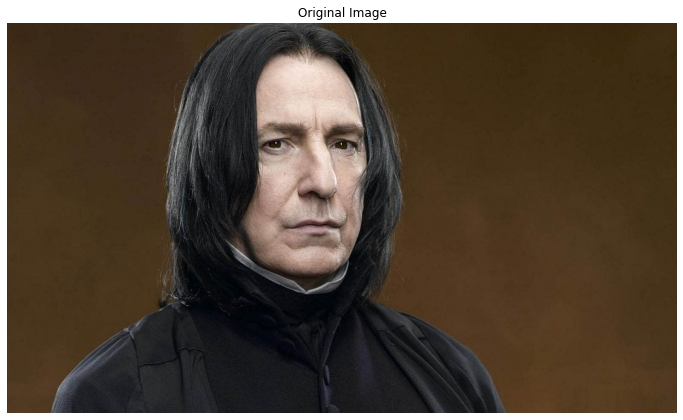

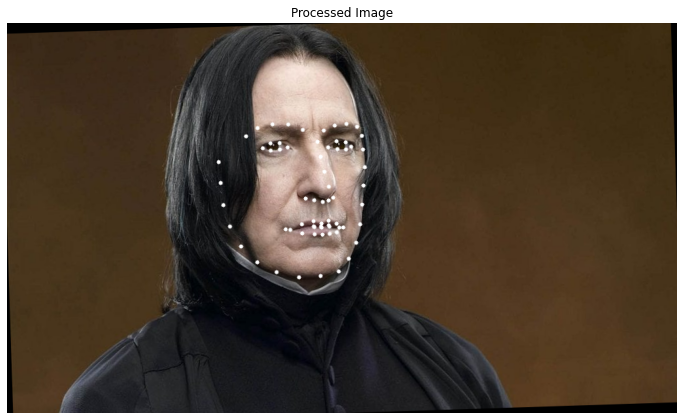

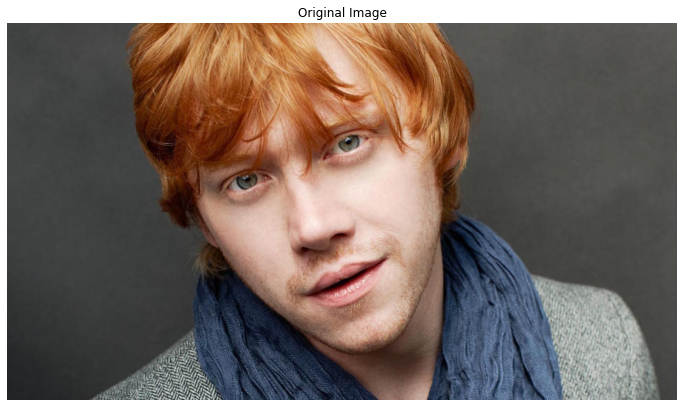

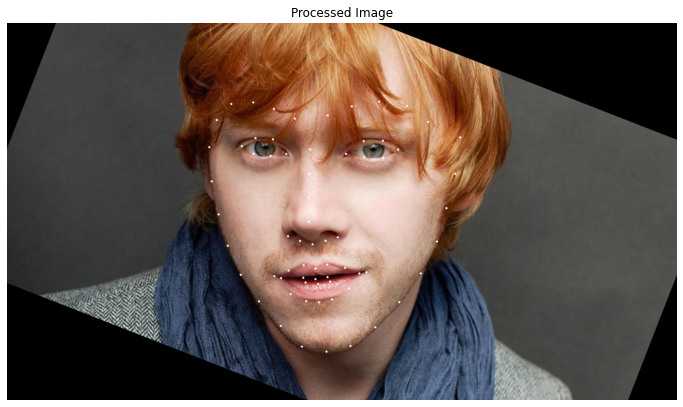

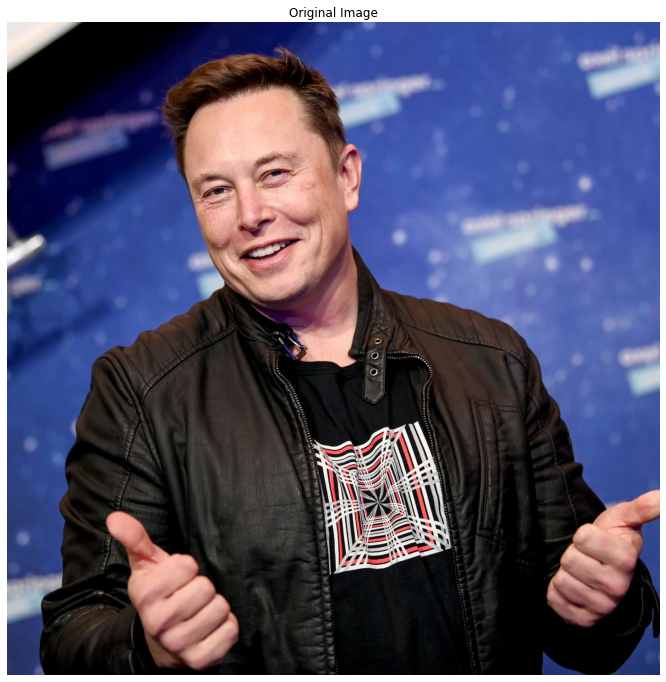

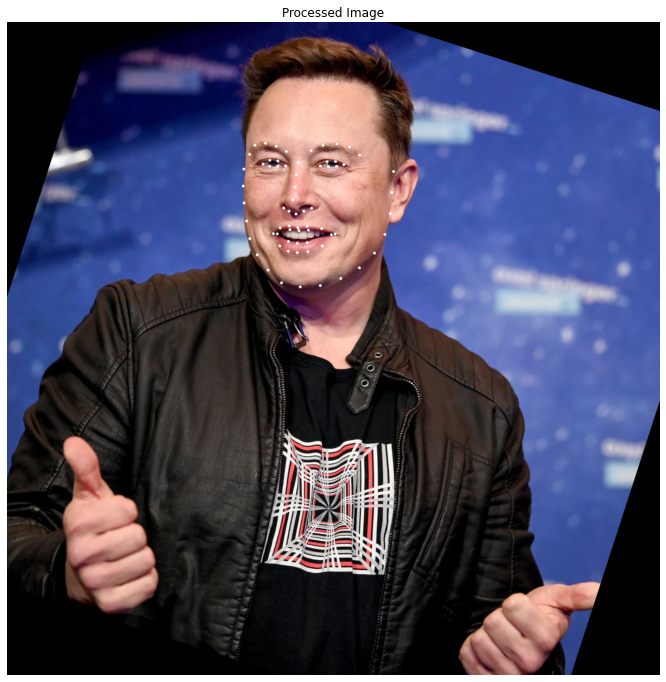

In [3]:
main()